## **PROJECT-3. EDA + Feature Engineering**

In [2]:
import pandas as pd
import re
from scipy import stats
import category_encoders as ce
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_classif
import numpy as np

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [4]:
hotels = pd.read_csv('data/hotels.csv') # читаем датасет

hotels.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,9/22/2015,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,8,10.0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681 day,48.888697,2.394540
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,3/5/2016,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,10,9.6,"[' Business trip ', ' Couple ', ' Standard Dou...",516 day,52.385601,4.847060



В каких столбцах данные содержат пропущенные значения?

In [346]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

пропуски в столбцах lat и lng

In [347]:
import numpy as np

# убираем признаки которые еще не успели обработать, 
#  модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим

object_columns = [s for s in hotels.columns if hotels[s].dtypes == 'object']
hotels.drop(object_columns, axis = 1, inplace=True)

# заполняем пропуски самым простым способом
hotels = hotels.fillna(0)

In [348]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х - данные с информацией об отелях, у - целевая переменная (рейтинги отелей)  
X = hotels.drop(['reviewer_score'], axis = 1)  
y = hotels['reviewer_score'] 

In [349]:
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split 

In [350]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [351]:
# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
  
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)  

In [352]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.14136506811108884


# Подготовка данных и анализ

In [404]:
hotels = pd.read_csv('data/hotels.csv') 
hotels.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097


In [405]:
# проверяем количество полных дубликатов
duple_columns = list(hotels.columns)

mask = hotels.duplicated(subset=duple_columns)
hotels_duplicates = hotels[mask]

print(f'Число найденных дубликатов: {hotels_duplicates.shape[0]}')

Число найденных дубликатов: 307


In [406]:
# ищем пропуски и смотрим на тип данных
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [407]:
hotels['review_date'] = pd.to_datetime(hotels['review_date']) # приводим дату к формату datetime

# Очистка данных и создание новых признаков

In [408]:
hotels = hotels.drop_duplicates(subset=duple_columns) # удаляем полные дубликаты


print(f'Результирующее число записей: {hotels.shape[0]}')

Результирующее число записей: 386496


In [409]:
# проверяем сколько в % у нас заполнено значений в столбцах с пропусками
cols_null_percent = hotels.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)


print(cols_with_null)

lat    0.633383
lng    0.633383
dtype: float64


In [410]:
# категориальный признак, модальное значение не подходит т.к. это координаты
hotels['lat'] = hotels['lat'].fillna(0, inplace=True)
hotels['lng'] = hotels['lng'].fillna(0, inplace=True)

In [411]:
regex = '[0-9]+' # регулярное выражение для нахождения чисел
hotels['days_since_review'] = hotels['days_since_review'].str.findall(regex).str.get(0) # находим число в строке
hotels['days_since_review']

0         531
1         203
2         289
3         681
4         516
         ... 
386798    106
386799    171
386800    543
386801     74
386802    363
Name: days_since_review, Length: 386496, dtype: object

In [412]:
hotels['days_since_review'] = hotels['days_since_review'].astype('int64') # строковый столбец в числовой

In [413]:
hotels['review_month'] = hotels['review_date'].dt.month # создание нового признака месяца

In [414]:
score_month = hotels.groupby('review_month').agg('mean') # группируем для визуализации

score_month

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,days_since_review
review_month,,,,,,,,
1,519.274179,8.412761,18.011081,2795.257795,17.940751,7.237982,8.482867,368.816949
2,532.683358,8.399714,18.149737,2783.876136,17.392033,7.031723,8.535112,348.440123
3,521.605550,8.395000,18.291798,2791.901881,17.685470,7.050096,8.481804,324.264208
4,506.741507,8.406614,19.267809,2749.001056,18.963356,6.995466,8.432337,292.183902
5,489.985922,8.398223,19.547282,2704.118076,18.899521,7.138357,8.386081,259.978652
6,485.932096,8.397631,19.777191,2719.800478,19.253454,6.815133,8.387518,224.753190
7,457.207011,8.395875,19.756211,2693.959719,18.842593,6.785122,8.339427,210.485396
8,487.296850,8.406057,18.091125,2749.803438,17.856249,7.091152,8.413316,462.470994
9,470.201519,8.387407,18.013422,2711.209773,16.762469,7.422918,8.294089,491.503103


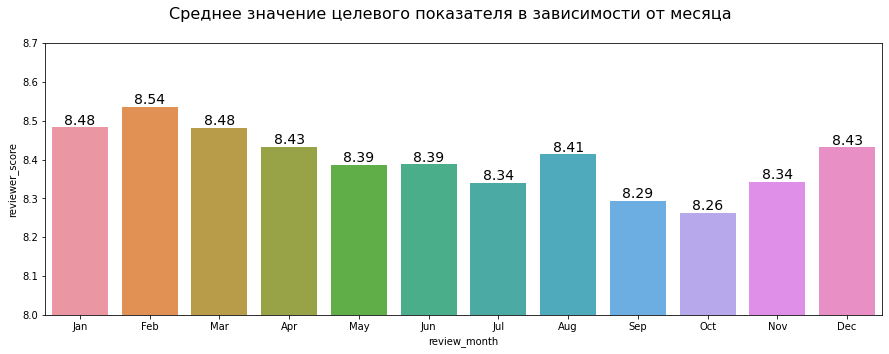

In [415]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.suptitle('Среднее значение целевого показателя в зависимости от месяца', size=16)
bar_month = sns.barplot(
    x=score_month.index, 
    y=score_month['reviewer_score'])
ax.set_xticklabels([
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

for p in bar_month.patches:
    bar_month.annotate(
        '{:.2f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
    ha='center', va='bottom', fontsize=14)

plt.ylim(8, 8.7);

На графике видно, что минимальные оценки приходятся на май-октябрь. Можем предположить, что это связано с наплывом посетителей. 

## Отели

In [416]:
# уникальные названия отелей
print('Отелей представлено: {}'.format(hotels['hotel_name'].nunique()))

Отелей представлено: 1492


In [417]:
# уникальный адрес и разное название 
name_address = hotels.pivot_table(
    values = 'hotel_address',
    index = 'hotel_name',
    aggfunc = 'nunique'
)
name_address.head()

,hotel_address
hotel_name,
11 Cadogan Gardens,1
1K Hotel,1
25hours Hotel beim MuseumsQuartier,1
41,1
45 Park Lane Dorchester Collection,1


In [418]:
# находим несколько отелей с одинаковым названием
dupl = name_address[name_address['hotel_address'] > 1]
dupl

,hotel_address
hotel_name,
Hotel Regina,3


In [419]:
# Cоздадим список, в котором будет храниться название отеля, имеющее несколько адресов.
dupl_list = dupl[dupl['hotel_address'] > 1].index.to_list()
dupl_list

['Hotel Regina']

In [420]:
# объединяем в строку название и адрес
hotels['hotel_name'] = hotels.apply(lambda x: (x['hotel_name'] + ' in ' + x['hotel_address'].split()[-1])
    if (x['hotel_name'] in dupl_list) else x['hotel_name'], axis=1)

hotels['hotel_name'].nunique()

1494

In [421]:
hotels[hotels['hotel_name'].str.contains(dupl_list[0])]['hotel_name'].value_counts()

Hotel Regina in Spain      440
Hotel Regina in Austria    222
Hotel Regina in Italy       47
Name: hotel_name, dtype: int64

In [422]:
# выделение страны из адреса
hotels['hotel_country'] = hotels['hotel_address'].apply(lambda x: x.split()[-1])
# United Kingdom 2 слова, начнем с него
hotels['hotel_country'] = hotels['hotel_country'].apply(lambda x:'United Kingdom' if x == 'Kingdom' else x) 
country_list = list(hotels['hotel_country'].unique()) # в датасете отели из 6 стран
country_list

['United Kingdom', 'France', 'Netherlands', 'Italy', 'Austria', 'Spain']

In [423]:
# выделение города из адреса
hotels['hotel_city'] = hotels['hotel_address'].apply(lambda x: x.split()[-2])
hotels['hotel_city'] = hotels['hotel_city'].apply(lambda x: 'London' if x == 'United' else x)
city_list = list(hotels['hotel_city'].unique())
city_list

['London', 'Paris', 'Amsterdam', 'Milan', 'Vienna', 'Barcelona']

In [424]:
# кодируем название страны
hotels['hotel_country'] = hotels['hotel_country'].astype('category')
hotels['hotel_country_code'] = hotels['hotel_country'].cat.codes

## Национальность резидента

In [425]:
# отсекаем пробелы в начале и в конце строки
hotels['reviewer_nationality'] = hotels['reviewer_nationality'].apply(lambda x: x.strip()) 


print('Рецензенты из {} стран оставили отзывы и оценки об отеле.'.format(hotels['reviewer_nationality'].nunique()))

Рецензенты из 225 стран оставили отзывы и оценки об отеле.


In [426]:
# кодируем информацию о стране рецензента:
hotels['reviewer_nationality'] = hotels['reviewer_nationality'].astype('category')
hotels['reviewer_nationality_code'] = hotels['reviewer_nationality'].cat.codes

## Тэги

In [427]:
# функция поиска тэгов
def count_tags(tags):
    express = re.findall("'[^\'](.+?)[^\']'", tags)
    return express

print('Уникальных тэгов: ', hotels['tags'].apply(count_tags).explode().nunique())

Уникальных тэгов:  2368


In [428]:
# Какой тег представлен в наибольшем числе отзывов?
print(hotels['tags'].apply(count_tags).explode().mode())

0    Leisure trip
Name: tags, dtype: object


In [429]:
# Введём новый признак count_nights (количество ночей)
def count_nights(tags):
    express = re.findall(r'Stayed\s([0-9]+)\snight', tags)
    return express

hotels['count_nights'] = hotels['tags'].apply(count_nights)

def convert(feature):
    for elem, num in enumerate(feature):
        return np.float64(num)
    
hotels['count_nights'] = hotels['count_nights'].apply(convert).convert_dtypes().fillna(1)

<AxesSubplot:xlabel='count_nights', ylabel="('count', 'reviewer_score')">

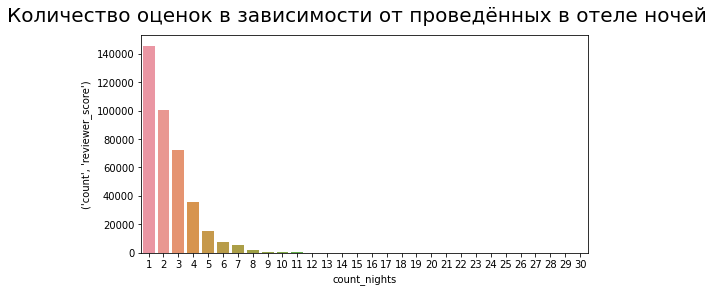

In [430]:
pivot_nights = pd.pivot_table(
    data=hotels,
    index='count_nights', 
    values='reviewer_score', 
    aggfunc=['count', 'mean'])

    
fig, ax = plt.subplots(figsize=(8, 4))
plt.suptitle('Количество оценок в зависимости от проведённых в отеле ночей', size=20)
sns.barplot(x=pivot_nights.index, y=pivot_nights[('count', 'reviewer_score')])

График говорить о том, что чем больше было ночей в отеле, тем меньше оценок о нем. Это может быть связано с тем, что клиентам не понравилось и они решили поменять отель.

## Общее количество отзывов

In [431]:
hotels['total_number_of_reviews_reviewer_has_given'].groupby(
    pd.cut(hotels['total_number_of_reviews_reviewer_has_given'], 
    np.arange(0, 500, 50))).agg('count'
)

hotels['total_number_of_reviews_reviewer_has_given'] = hotels[
    'total_number_of_reviews_reviewer_has_given'].apply(
    lambda x: np.log(x+1)
)

hotels['total_number_of_reviews_reviewer_has_given']

0         2.079442
1         2.708050
2         2.708050
3         2.197225
4         2.397895
            ...   
386798    2.397895
386799    0.693147
386800    3.091042
386801    3.367296
386802    1.098612
Name: total_number_of_reviews_reviewer_has_given, Length: 386496, dtype: float64

In [432]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386496 entries, 0 to 386802
Data columns (total 23 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               386496 non-null  object        
 1   additional_number_of_scoring                386496 non-null  int64         
 2   review_date                                 386496 non-null  datetime64[ns]
 3   average_score                               386496 non-null  float64       
 4   hotel_name                                  386496 non-null  object        
 5   reviewer_nationality                        386496 non-null  category      
 6   negative_review                             386496 non-null  object        
 7   review_total_negative_word_counts           386496 non-null  int64         
 8   total_number_of_reviews                     386496 non-null  int64        

Вычислим долю слов положительных комментариев среди всех комментариев. Пометим строку, если количество слов в пложительном комментарии преобладает над количеством слов в отрицательном.

In [433]:
hotels['review_total_positive_word_counts_norm']  = pd.DataFrame(
    MinMaxScaler().fit_transform(pd.DataFrame(hotels['review_total_positive_word_counts'])),
    columns=['review_total_positive_word_counts'])

hotels['review_total_negative_word_counts_norm']  = pd.DataFrame(
    MinMaxScaler().fit_transform(pd.DataFrame(hotels['review_total_negative_word_counts'])),
    columns=['review_total_negative_word_counts'])

hotels['review_total_word_diff_norm'] = hotels['review_total_positive_word_counts_norm'] - hotels['review_total_negative_word_counts_norm']

hotels['more_positive'] = hotels['review_total_word_diff_norm'].apply(lambda x: 1 if x >= 0 else 0)

hotels.drop(
    ['review_total_positive_word_counts_norm', 'review_total_negative_word_counts_norm'], 
    axis=1, inplace=True)

In [434]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386496 entries, 0 to 386802
Data columns (total 25 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               386496 non-null  object        
 1   additional_number_of_scoring                386496 non-null  int64         
 2   review_date                                 386496 non-null  datetime64[ns]
 3   average_score                               386496 non-null  float64       
 4   hotel_name                                  386496 non-null  object        
 5   reviewer_nationality                        386496 non-null  category      
 6   negative_review                             386496 non-null  object        
 7   review_total_negative_word_counts           386496 non-null  int64         
 8   total_number_of_reviews                     386496 non-null  int64        

In [435]:
hotels['review_total_word_diff_norm'] = hotels['review_total_word_diff_norm'].fillna(0)

In [436]:
hotels['review_total_word_sum'] = hotels['review_total_positive_word_counts'
    ] + hotels['review_total_negative_word_counts'
]

# пополам отрицательных и положительных
hotels['positive_words_proportion'] = hotels.apply( lambda x: 0.5 if x[
    'review_total_word_sum'] == 0 else x[
    'review_total_positive_word_counts'] / x['review_total_word_sum'],axis=1
)

hotels.drop('review_total_word_sum', axis = 1, inplace=True)

# Отбор признаков

In [437]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386496 entries, 0 to 386802
Data columns (total 26 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               386496 non-null  object        
 1   additional_number_of_scoring                386496 non-null  int64         
 2   review_date                                 386496 non-null  datetime64[ns]
 3   average_score                               386496 non-null  float64       
 4   hotel_name                                  386496 non-null  object        
 5   reviewer_nationality                        386496 non-null  category      
 6   negative_review                             386496 non-null  object        
 7   review_total_negative_word_counts           386496 non-null  int64         
 8   total_number_of_reviews                     386496 non-null  int64        

In [438]:
hotels_cp = hotels.copy()

In [439]:
object_columns = [s for s in hotels.columns if hotels[s].dtypes == 'object'] #список со столбцами
hotels.drop(object_columns, axis = 1, inplace=True) # удаляем столбцы

# также избавимся от других нечисловых признаков: category, datetime64[ns]
cat_date_columns = [cd for cd in hotels.columns if ((hotels[cd].dtypes.name == 'category') or (hotels[cd].dtypes == 'datetime64[ns]'))]
hotels.drop(cat_date_columns, axis = 1, inplace=True)

hotels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386496 entries, 0 to 386802
Data columns (total 15 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                386496 non-null  int64  
 1   average_score                               386496 non-null  float64
 2   review_total_negative_word_counts           386496 non-null  int64  
 3   total_number_of_reviews                     386496 non-null  int64  
 4   review_total_positive_word_counts           386496 non-null  int64  
 5   total_number_of_reviews_reviewer_has_given  386496 non-null  float64
 6   reviewer_score                              386496 non-null  float64
 7   days_since_review                           386496 non-null  int64  
 8   review_month                                386496 non-null  int64  
 9   hotel_country_code                          386496 non-null  int8   
 

## Анализ мультиколлинеарности

In [440]:
cols_num = [
    'review_total_negative_word_counts',
    'review_total_positive_word_counts',
    'review_total_word_diff_norm',
    'total_number_of_reviews_reviewer_has_given',
    'positive_words_proportion'  
]

cols_cat = ['additional_number_of_scoring',
    'average_score',
    'total_number_of_reviews',
    'days_since_review',
    'hotel_country_code',
    'reviewer_nationality_code',
    'count_nights',
    'review_month',
    'more_positive'
]

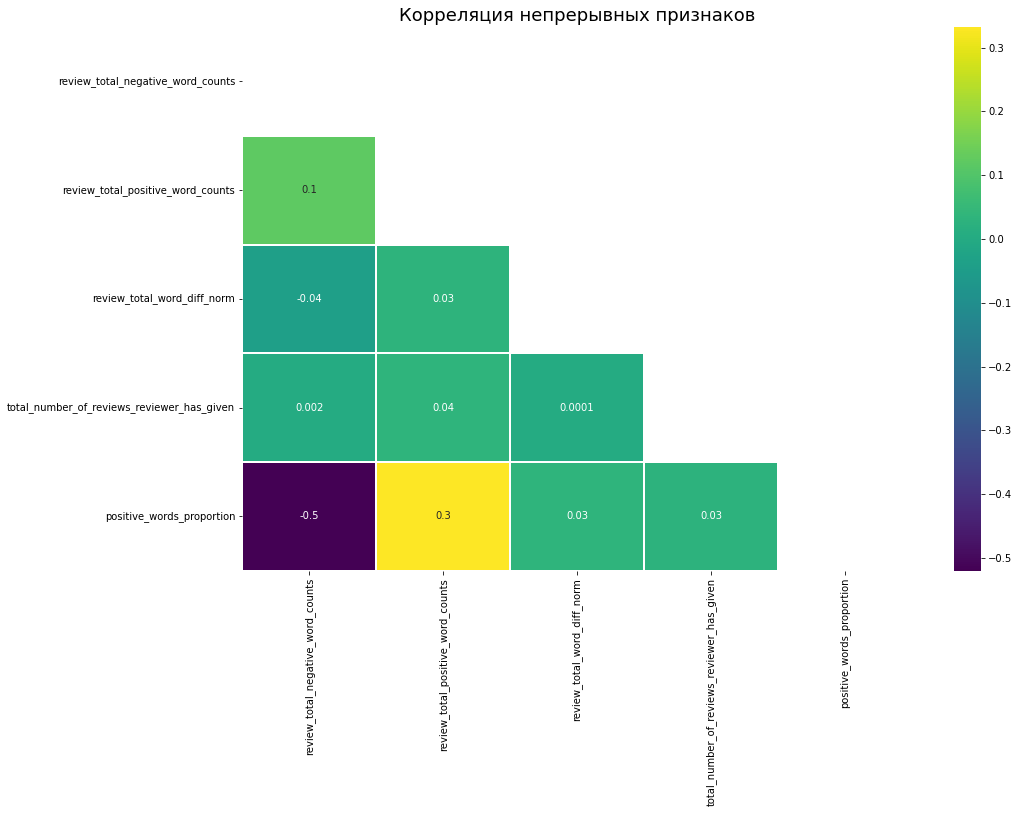

In [441]:
fig_, ax_ = plt.subplots(figsize=(15, 10))
corr = hotels[cols_num].corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, 
            annot=True, 
            linewidths=0.1, 
            ax=ax_, 
            mask=mask, 
            cmap='viridis',
            fmt='.1g')
ax_.set_title('Корреляция непрерывных признаков', fontsize=18)
plt.show()

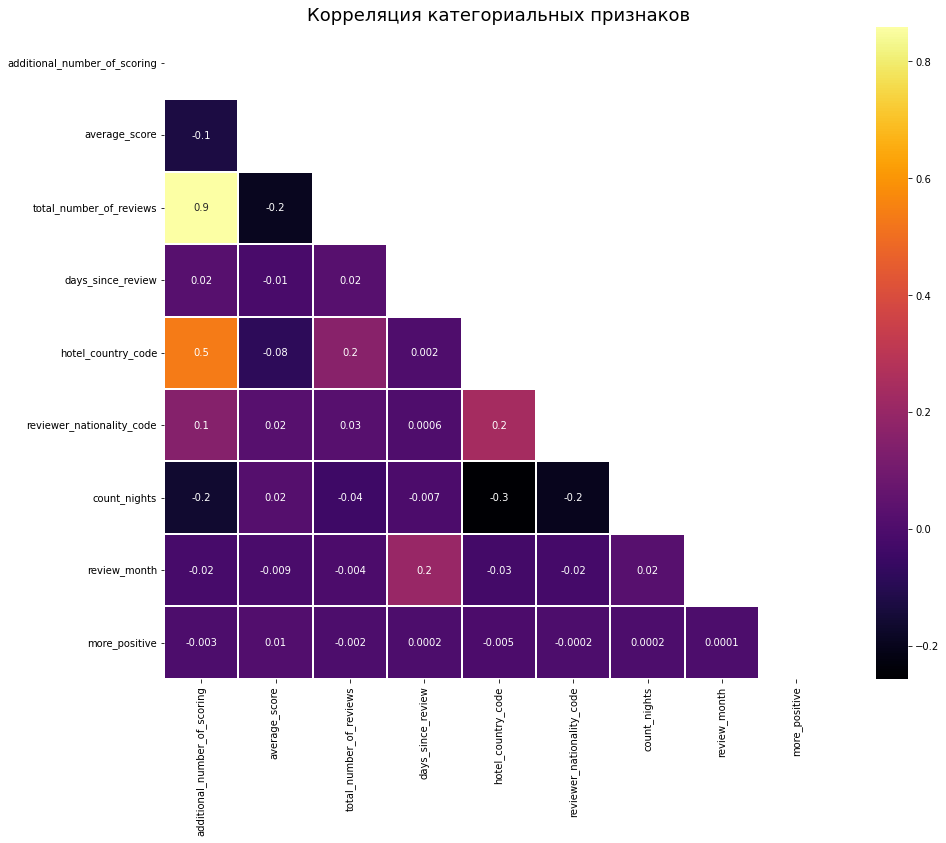

In [442]:
fig_, ax_ = plt.subplots(figsize=(15, 12))
corr = hotels[cols_cat].corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, 
            annot=True, 
            linewidths=0.1, 
            ax=ax_, 
            mask=mask, 
            cmap='inferno',
            fmt='.1g')
ax_.set_title('Корреляция категориальных признаков', fontsize=18)
plt.show()

Удаляем признаки с корреляцией больше 0.8

In [443]:
cols_num = [
    'review_total_negative_word_counts',
    'review_total_positive_word_counts',
    'review_total_word_diff_norm',
    'total_number_of_reviews_reviewer_has_given',
    'positive_words_proportion'  
]

cols_cat = ['average_score',
    'total_number_of_reviews',
    'days_since_review',
    'hotel_country_code',
    'reviewer_nationality_code',
    'count_nights',
    'review_month',
    'more_positive'
]

In [444]:
hotels.drop('additional_number_of_scoring', axis = 1, inplace=True)

In [445]:
print('Осталось признаков: {}'.format(hotels.shape[1]))

Осталось признаков: 14


In [446]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386496 entries, 0 to 386802
Data columns (total 14 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   average_score                               386496 non-null  float64
 1   review_total_negative_word_counts           386496 non-null  int64  
 2   total_number_of_reviews                     386496 non-null  int64  
 3   review_total_positive_word_counts           386496 non-null  int64  
 4   total_number_of_reviews_reviewer_has_given  386496 non-null  float64
 5   reviewer_score                              386496 non-null  float64
 6   days_since_review                           386496 non-null  int64  
 7   review_month                                386496 non-null  int64  
 8   hotel_country_code                          386496 non-null  int8   
 9   reviewer_nationality_code                   386496 non-null  int16  
 

## Оценка значимости признаков

Для оценки значимости категориальных признаков будем использовать тест хи-квадрат, для непрерывных признаков — тест ANOVA.

<AxesSubplot:>

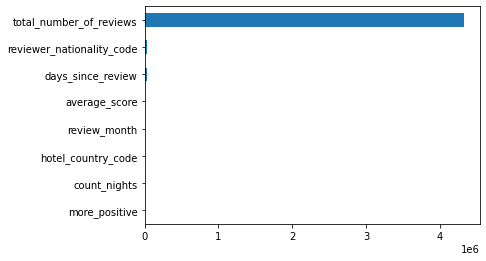

In [447]:
X = hotels.drop(['reviewer_score'], axis = 1)  
y = hotels['reviewer_score']
y=y.astype('int')

from sklearn.feature_selection import chi2 # хи-квадрат

imp_cat = pd.Series(chi2(X[cols_cat], y)[0], index=cols_cat)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

<AxesSubplot:>

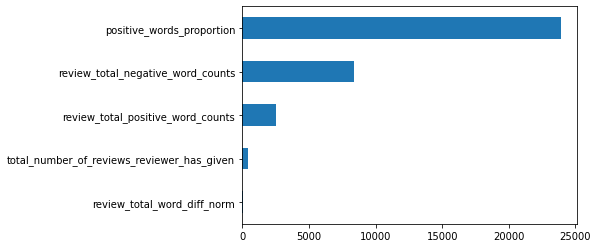

In [448]:
from sklearn.feature_selection import f_classif # anova

imp_num = pd.Series(f_classif(X[cols_num], y)[0], index = cols_num)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

In [449]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х - данные с информацией об отелях, у - целевая переменная (рейтинги отелей)  
X = hotels.drop(['reviewer_score'], axis = 1)  
y = hotels['reviewer_score'] 

# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)  

In [450]:
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.13579031966100918
